# Test Notebook for Confidence Regions Toolbox

## Import Packages

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install nilearn
!pip install nibabel

In [2]:
# Basic imports
import numpy
import yaml
import matplotlib.pyplot as plt

# Imports from Confidence Regions Toolbox
from generate import generate_CRs
from bootstrap import bootstrap_resids
from coverage import check_violations

# Import supporting functions
from lib.set_theory import *
from lib.boundary import *

# Import data generation
from tests.generateData import *


## Data Generation

Initial parameters.

In [3]:
# Number of fields m
m = 3

# Get number of subjects
nSub = 80

# Get number of simulation realizations
nReals = 100

# Get number of bootstraps
nBoot = 5000

# Get Threshold
c = 2

# Get p values
p = np.linspace(0,1,21)

# Get the number of p-values we're looking at
nPvals = len(p)

# Get Tau
tau = '1/np.sqrt(nSub)'

# Dimensions of simulated data
data_dim = np.array([nSub, 100,100])

Create some circular signals.

In [4]:
# ---------------------------------------------------------------
# Mus
# ---------------------------------------------------------------
# Create empty specifications
mu_specs = {}

# Loop through mus, adding each field in turn
for i in np.arange(m):

    # New empty dict
    mu_specs['mu'+str(i+1)]={}

    # Mu type
    mu_specs['mu'+str(i+1)]['type'] = 'circle2D' 

    # Mu FWHM
    mu_specs['mu'+str(i+1)]['fwhm'] = np.array([5,5])

    # Mu r
    mu_specs['mu'+str(i+1)]['r'] = 40

    # Mu magnitude
    mu_specs['mu'+str(i+1)]['mag'] = 3

    # Get some evenly spaced center points
    centers = circle_points(np.array([25]),np.array([m]))

    # Mu center
    mu_specs['mu'+str(i+1)]['center'] = centers[i,:].astype(np.int)

# ---------------------------------------------------------------
# Epsilons
# ---------------------------------------------------------------
# Create empty specifications
noise_specs = {}

# Loop through noises, adding each field in turn
for i in np.arange(m):

    # New empty dict
    noise_specs['noise'+str(i+1)]={}

    # Add FWHM
    noise_specs['noise'+str(i+1)]['FWHM'] = np.array([0, 3, 3])

    # Add type
    noise_specs['noise'+str(i+1)]['type'] = 'homogen'

/home/tommaullin/Documents/ConfSets_Rehaul/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Generate the data.

In [5]:
for i in np.arange(m):

    # ----------------------------------------------------------------
    # Data generation
    # ----------------------------------------------------------------

    # Obtain noise
    noise = get_noise(noise_specs['noise'+str(i+1)], data_dim)

    # Obtain mu
    mu = get_mu(mu_specs['mu'+str(i+1)], data_dim)

    # Create the data
    data = mu + noise

    # Save mus
    if i == 0:
        mus = np.array(mu)
    else:
        mus = np.concatenate((mus,mu),axis=0)

    # Combine data
    if i == 0:
        datas = np.array(data.reshape(1,*(data.shape)))
    else:
        datas = np.concatenate((datas,data.reshape(1,*(data.shape))),axis=0)

## Make Some Plots

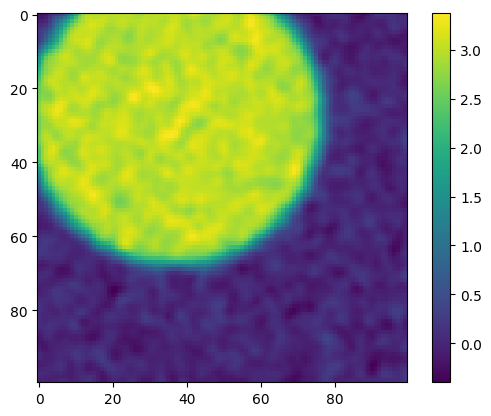

In [6]:
# Data for the "5th" subject
plt.imshow(np.mean(datas,axis=1)[2,:,:])
plt.colorbar()

## Generate Confidence Regions